# Classical Machine Learning - Regression Models

#### Import necessary dependencies

In [1]:
import numpy as np

import sklearn
import sklearn.datasets as ds
    # Needed for generating datasets
from sklearn.metrics import mean_squared_error as MSE

import matplotlib.pyplot as plt
import seaborn as sns

### Creating fake data

In [2]:
rand_state = np.random.RandomState() 

X, y = ds.make_regression(n_samples=1000, n_features=1, 
                         noise=25, random_state=rand_state)
y -= min(y)
y = y/max(y)*100
X -= min(X)

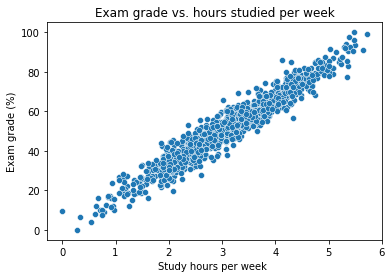

In [3]:
# plot data
x = [x[0] for x in X]
plot = sns.scatterplot(x=x, y=y)

plt.title('Exam grade vs. hours studied per week')
plt.xlabel('Study hours per week ')
plt.ylabel('Exam grade (%)')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2)

## Linear regression

Linear Regression training set R^2: 0.93


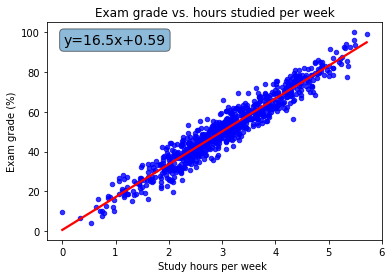

In [5]:
from sklearn.linear_model import LinearRegression

# Instantiate linear regression model
lr = LinearRegression().fit(X_train, y_train)

r_sqr = lr.score(X_train, y_train)
print('Linear Regression training set R^2: {:.2f}'.format(r_sqr))

# plot data with fit line
plot = sns.regplot(x=X_train, y=y_train, scatter_kws={"s":20, "color": "blue"},
                   fit_reg=True, ci=None, line_kws={"color": "red"})

props = dict(boxstyle='round', alpha=0.5)
textstr = f'y={round(lr.coef_[0], 2)}x+{round(lr.intercept_, 2)}'
plot.text(0.05, 0.9, textstr, transform=plot.transAxes, fontsize=14, bbox=props)

plt.title('Exam grade vs. hours studied per week')
plt.xlabel('Study hours per week ')
plt.ylabel('Exam grade (%)')
plt.show()

In [15]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

r_sqr = lr.score(X_test, y_test)
print('Linear Regression training set R^2: {:.2f}'.format(r_sqr))

Linear Regression test set RMSE: 4.83
Linear Regression training set R^2: 0.92


## Decision Tree

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(
    max_depth=4,
    random_state=3)

# Fit dt to the training set
dtr = dt.fit(X_train, y_train)

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Decision tree test set RMSE: {:.2f}".format(rmse_dt))

Decision tree test set RMSE: 5.37


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate dt
rf = RandomForestRegressor(
    max_depth=4,
    random_state=3)

# Fit dt to the training set
rfr = rf.fit(X_train, y_train)

# Compute y_pred
y_pred_rf = rf.predict(X_test)

# Compute mse_dt
mse_rf = MSE(y_test, y_pred_rf)

# Compute rmse_dt
rmse_rf = mse_rf**(1/2)

# Print rmse_dt
print("Random Forest test set RMSE: {:.2f}".format(rmse_rf))

Random Forest test set RMSE: 5.08


## Comparing Models' RMSE

From the above data and parameter selection, the linear regression model beat out the decision tree and random forest (all from sklearn). Of course we can change the hyperparameters (max_depth and min_samples_leaf) for the decision tree and random forest, which can alter the results. The hyperparameters have to be chosen carefully.

RSME:
  * Linear Regression test set RMSE: 4.83

  * When max_depth=8 and min_samples_leaf=0.13:
    * Decision tree test set RMSE: 7.19
    * Random Forest test set RMSE: 7.24

  * When max_depth=8 and min_samples_leaf=1 (default):
    * Decision tree test set RMSE: 6.13
    * Random Forest test set RMSE: 5.47
  
  * When max_depth=4 and min_samples_leaf=1 (default):
    * Decision tree test set RMSE: 5.37
    * Random Forest test set RMSE: 5.08

This result does make sense considering the data was generated to be linear with a fair lack of noise. It can also